In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [61]:
# Load the credit card dataset
print("Loading dataset...")
data = pd.read_csv('creditcard.csv')


Loading dataset...


In [62]:
# Display basic information about the dataset
print("\n--- Dataset Overview ---")
print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
print(data.head())


--- Dataset Overview ---
Dataset shape: (284807, 31)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.7982

In [63]:
print("\nLast 5 rows:")
print(data.tail())


Last 5 rows:
            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.5093

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [65]:
print("\nDataset information:")
print(data.info())



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

In [66]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [67]:
# Analyze class distribution
print("\n--- Class Distribution ---")
class_distribution = data['Class'].value_counts()
print(class_distribution)
print(f"Fraud cases: {class_distribution[1]} ({class_distribution[1]/len(data)*100:.2f}%)")
print(f"Normal cases: {class_distribution[0]} ({class_distribution[0]/len(data)*100:.2f}%)")


--- Class Distribution ---
Class
0    284315
1       492
Name: count, dtype: int64
Fraud cases: 492 (0.17%)
Normal cases: 284315 (99.83%)


In [68]:
# Separate legitimate and fraudulent transactions
legit = data[data.Class == 0]  # Normal transactions
fraud = data[data.Class == 1]  # Fraudulent transactions
print(f"\nLegitimate transactions shape: {legit.shape}")
print(f"Fraudulent transactions shape: {fraud.shape}")



Legitimate transactions shape: (284315, 31)
Fraudulent transactions shape: (492, 31)


In [69]:
# Analyze transaction amounts
print("\n--- Transaction Amount Analysis ---")
print("Statistics for legitimate transactions:")
print(legit.Amount.describe())
print("\nStatistics for fraudulent transactions:")
print(fraud.Amount.describe())



--- Transaction Amount Analysis ---
Statistics for legitimate transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Statistics for fraudulent transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [70]:
# Compare means of features between classes
print("\n--- Feature Means by Class ---")
print(data.groupby('Class').mean())



--- Feature Means by Class ---
               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1

In [71]:
# Create a balanced dataset using undersampling
# Note: This is a simple approach; consider using SMOTE or other techniques for better results
print("\n--- Creating Balanced Dataset ---")
print("Using undersampling for demonstration purposes...")
n_fraud = len(fraud)
legit_sample = legit.sample(n=n_fraud, random_state=42)
balanced_data = pd.concat([legit_sample, fraud], axis=0)
print(f"Balanced dataset shape: {balanced_data.shape}")
print(balanced_data['Class'].value_counts())


--- Creating Balanced Dataset ---
Using undersampling for demonstration purposes...
Balanced dataset shape: (984, 31)
Class
0    492
1    492
Name: count, dtype: int64


In [72]:
# Feature scaling - often important for logistic regression
print("\n--- Feature Scaling ---")
scaler = StandardScaler()
# Excluding 'Class' column and scaling all features
X = balanced_data.drop(columns='Class', axis=1)
Y = balanced_data['Class']
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


--- Feature Scaling ---


In [73]:
# Split data into training and testing sets
print("\n--- Train-Test Split ---")
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled_df, Y, test_size=0.2, stratify=Y, random_state=42
)
print(f"Training set shape: {X_train.shape}, {Y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {Y_test.shape}")


--- Train-Test Split ---
Training set shape: (787, 30), (787,)
Testing set shape: (197, 30), (197,)


In [74]:
# Train logistic regression model
print("\n--- Model Training ---")
# Increased max_iter to ensure convergence, added solver and C parameters
model = LogisticRegression(max_iter=10000, solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, Y_train)


--- Model Training ---


LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')

In [75]:
# Evaluate model performance on training data
print("\n--- Model Evaluation ---")
Y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training accuracy: {training_accuracy:.4f}")


--- Model Evaluation ---
Training accuracy: 0.9454


In [76]:
# Evaluate model performance on test data
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9645


In [77]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [78]:
# Generate confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred)
print(cm)



Confusion Matrix:
[[97  2]
 [ 5 93]]


In [79]:
# Calculate precision, recall, f1-score
print("\nDetailed metrics:")
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Detailed metrics:
Precision: 0.9789
Recall: 0.9490
F1-score: 0.9637


In [80]:
# Save model for future use
print("\n--- Saving Model ---")
import joblib
joblib.dump(model, 'credit_card_fraud_model.pkl')
print("Model saved as 'credit_card_fraud_model.pkl'")


--- Saving Model ---
Model saved as 'credit_card_fraud_model.pkl'


In [86]:
# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

def visualize_credit_card_fraud(data, X, Y, X_train, Y_train, X_test, Y_test, model, Y_test_pred):
    """
    Generate comprehensive visualizations for credit card fraud detection analysis.
    
    Parameters:
    ----------
    data : pandas DataFrame
        Original dataset with features and Class column
    X : pandas DataFrame
        Features used for modeling
    Y : pandas Series
        Target variable (Class)
    X_train, Y_train : Training data
    X_test, Y_test : Test data
    model : trained model
    Y_test_pred : model predictions on test data
    """
    # Create a figure for multiple plots
    plt.figure(figsize=(20, 25))
    
    # 1. Class Distribution - Pie Chart
    plt.subplot(3, 2, 1)
    labels = ['Normal', 'Fraud']
    class_counts = data['Class'].value_counts()
    plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
    plt.title('Class Distribution in Original Dataset', fontsize=14)
    
    # 2. Transaction Amount Distribution - Fix for NaN/Inf values
    plt.subplot(3, 2, 2)
    # Check for and remove any infinite or NaN values
    clean_data = data.copy()
    clean_data['Amount'] = clean_data['Amount'].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Filter out any NaN values before plotting
    valid_data = clean_data.dropna(subset=['Amount'])
    
    # Use clipping to handle extreme values instead of log scale if necessary
    upper_limit = valid_data['Amount'].quantile(0.99)  # Use 99th percentile to avoid outliers
    valid_data['Amount_Clipped'] = valid_data['Amount'].clip(upper=upper_limit)
    
    # Plot with regular scale instead of log_scale
    sns.histplot(data=valid_data, x='Amount_Clipped', hue='Class', bins=50, kde=False)
    plt.title('Transaction Amount Distribution (Clipped at 99th percentile)', fontsize=14)
    plt.xlabel('Amount')
    plt.ylabel('Count')
    
    # 3. Feature Correlation Heatmap (using a subset of features for clarity)
    plt.subplot(3, 2, 3)
    try:
        # Select first 8 V features plus Amount and Class for clarity
        correlation_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'Amount', 'Class']
        correlation_features = [f for f in correlation_features if f in data.columns]
        correlation_data = data[correlation_features].corr()
        sns.heatmap(correlation_data, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar=True)
        plt.title('Feature Correlation Heatmap', fontsize=14)
    except Exception as e:
        plt.text(0.5, 0.5, f"Error in correlation plot: {str(e)}", horizontalalignment='center', fontsize=12)
    
    # 4. PCA Visualization of the dataset (2D projection)
    plt.subplot(3, 2, 4)
    try:
        # Apply PCA to reduce dimensions to 2 for visualization
        # Handle NaN values in X
        X_for_pca = X.fillna(X.mean())
        
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_for_pca)
        pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
        pca_df['Class'] = Y.values
        
        # Plot the 2D projection
        sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, alpha=0.6, palette={0: '#66b3ff', 1: '#ff9999'})
        plt.title(f'PCA Projection (Explained Variance: {pca.explained_variance_ratio_.sum():.2%})', fontsize=14)
    except Exception as e:
        plt.text(0.5, 0.5, f"Error in PCA plot: {str(e)}", horizontalalignment='center', fontsize=12)
    
    # 5. Confusion Matrix Heatmap
    plt.subplot(3, 2, 5)
    try:
        cm = confusion_matrix(Y_test, Y_test_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix', fontsize=14)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
    except Exception as e:
        plt.text(0.5, 0.5, f"Error in confusion matrix plot: {str(e)}", horizontalalignment='center', fontsize=12)
    
    # 6. ROC Curve
    plt.subplot(3, 2, 6)
    try:
        Y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_score)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic', fontsize=14)
        plt.legend(loc="lower right")
    except Exception as e:
        plt.text(0.5, 0.5, f"Error in ROC curve plot: {str(e)}", horizontalalignment='center', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('credit_card_fraud_visualization.png', dpi=300)
    plt.show()
    
    # 7. Feature Importance Plot (separate figure)
    plt.figure(figsize=(12, 8))
    try:
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': np.abs(model.coef_[0])
        })
        feature_importance = feature_importance.sort_values('Importance', ascending=False)
        
        # Take top 15 or fewer if there aren't that many features
        top_n = min(15, len(feature_importance))
        sns.barplot(x='Importance', y='Feature', data=feature_importance[:top_n])
        plt.title(f'Top {top_n} Feature Importance', fontsize=14)
        plt.tight_layout()
        plt.savefig('credit_card_fraud_feature_importance.png', dpi=300)
        plt.show()
    except Exception as e:
        plt.text(0.5, 0.5, f"Error in feature importance plot: {str(e)}", horizontalalignment='center', fontsize=12)
        plt.tight_layout()
        plt.savefig('credit_card_fraud_feature_importance.png', dpi=300)
        plt.show()
    
    # 8. Precision-Recall Curve (separate figure)
    plt.figure(figsize=(10, 8))
    try:
        Y_score = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(Y_test, Y_score)
        pr_auc = auc(recall, precision)
        
        plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve', fontsize=14)
        plt.legend(loc="lower left")
        plt.grid(True)
        plt.savefig('credit_card_fraud_precision_recall.png', dpi=300)
        plt.show()
    except Exception as e:
        plt.text(0.5, 0.5, f"Error in precision-recall curve plot: {str(e)}", horizontalalignment='center', fontsize=12)
        plt.tight_layout()
        plt.savefig('credit_card_fraud_precision_recall.png', dpi=300)
        plt.show()
    
    # 9. Time Series of Transactions (separate figure)
    if 'Time' in data.columns:
        plt.figure(figsize=(15, 6))
        try:
            data_sorted = data.sort_values('Time')
            fraud_data = data_sorted[data_sorted['Class'] == 1]
            
            plt.plot(data_sorted['Time'], np.zeros(len(data_sorted)), 'b|', alpha=0.1, label='Normal')
            plt.plot(fraud_data['Time'], np.zeros(len(fraud_data)), 'r|', label='Fraud')
            plt.xlabel('Time (seconds from first transaction)')
            plt.title('Transaction Timeline', fontsize=14)
            plt.legend()
            plt.savefig('credit_card_fraud_timeline.png', dpi=300)
            plt.show()
        except Exception as e:
            plt.text(0.5, 0.5, f"Error in timeline plot: {str(e)}", horizontalalignment='center', fontsize=12)
            plt.tight_layout()
            plt.savefig('credit_card_fraud_timeline.png', dpi=300)
            plt.show()

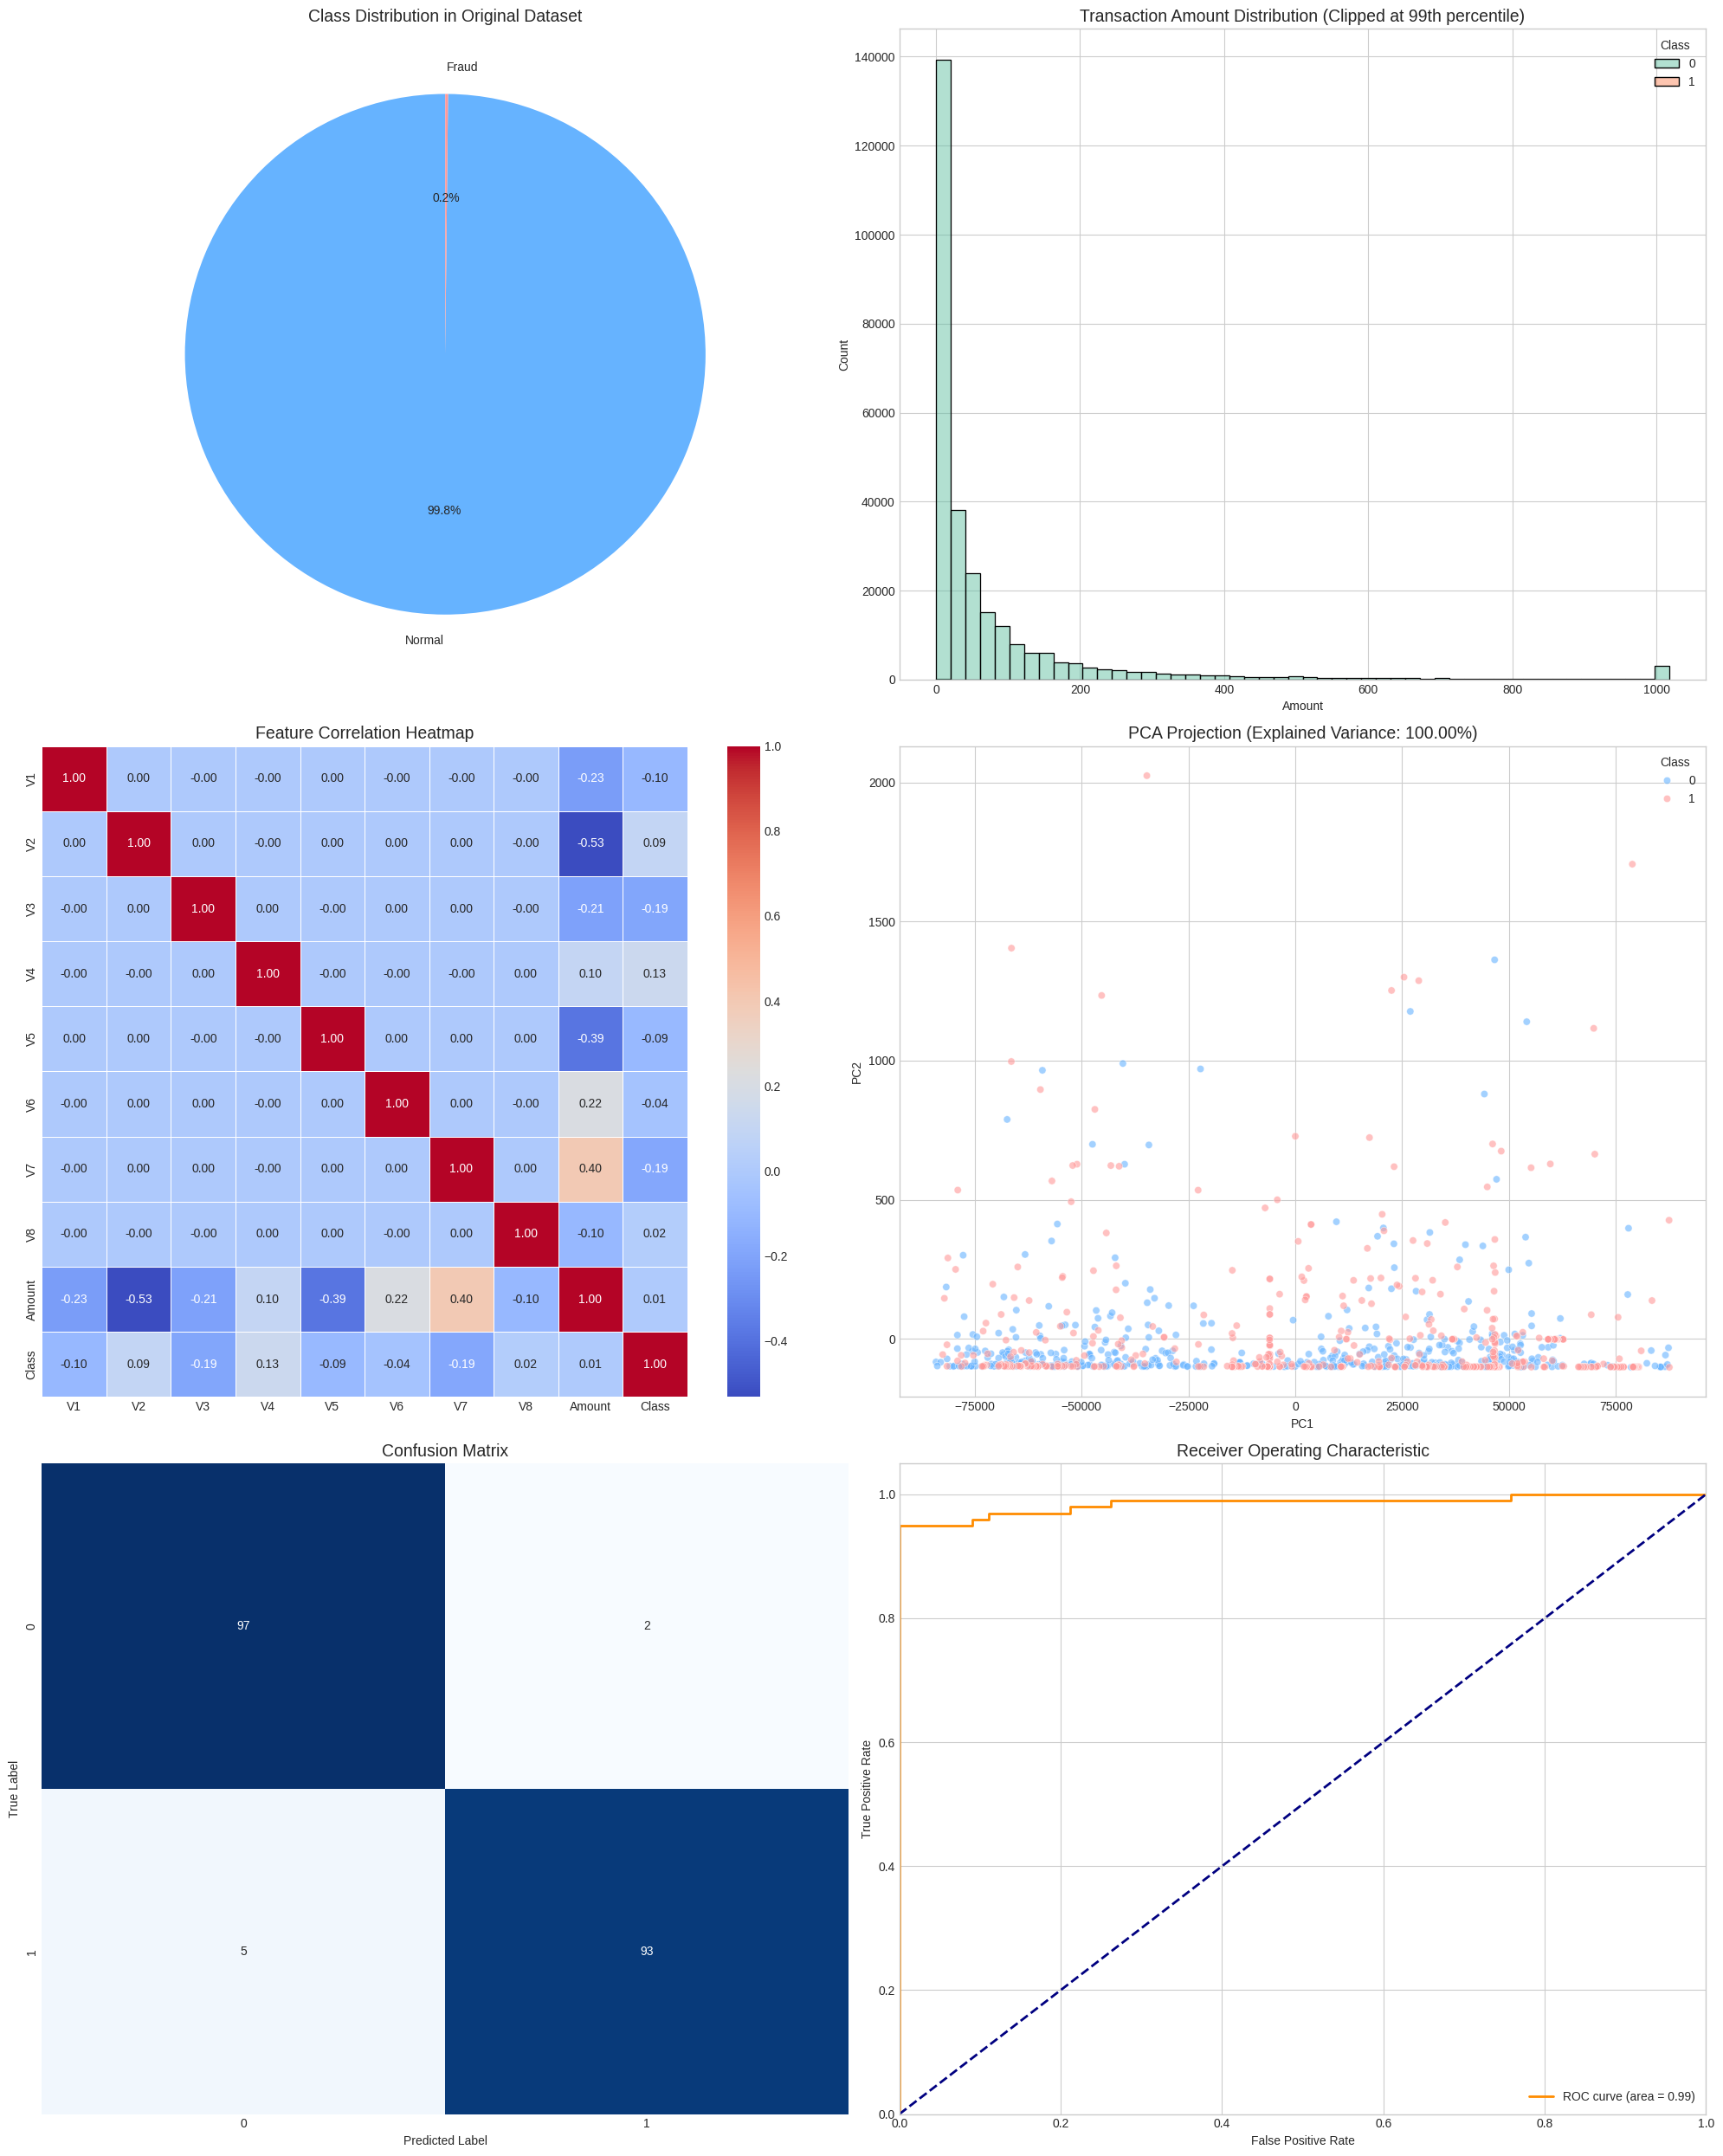

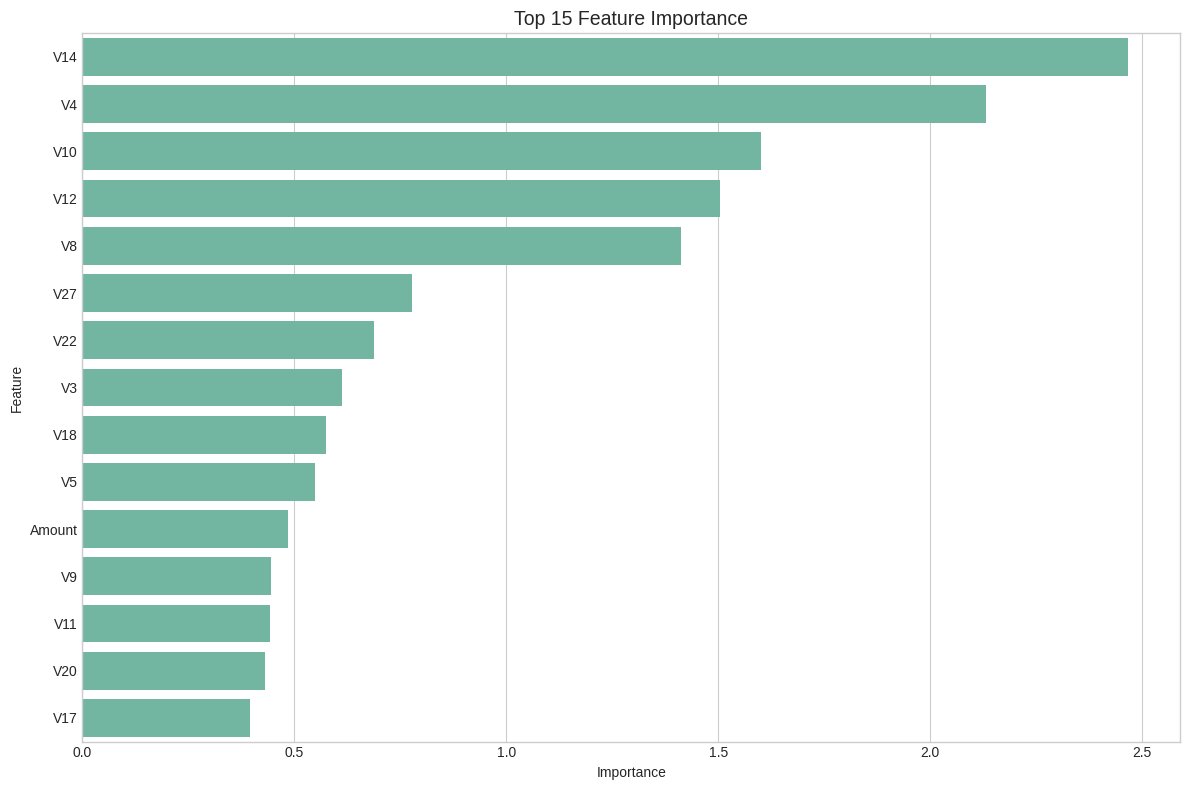

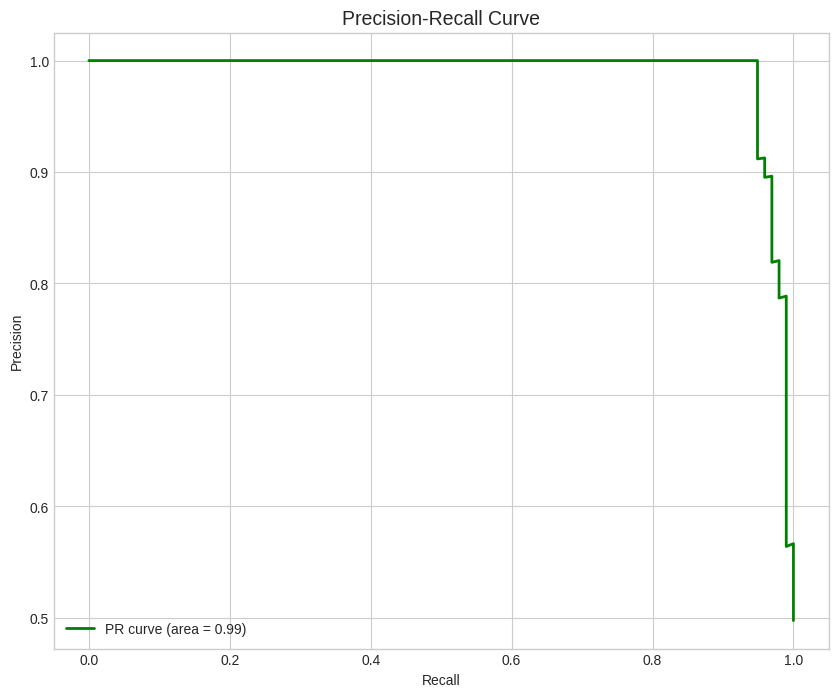

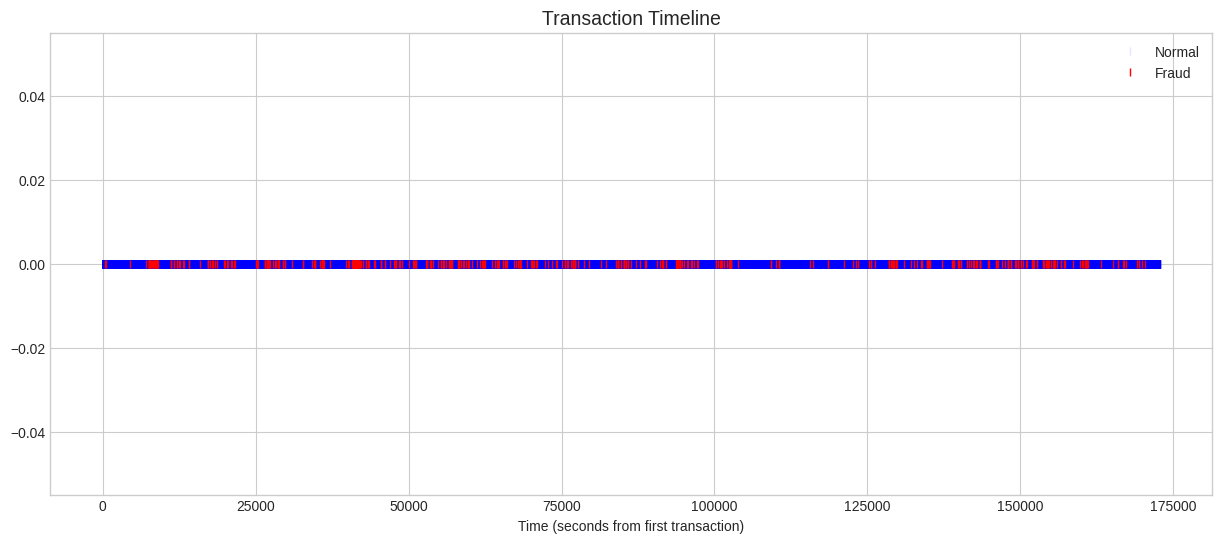

In [87]:
visualize_credit_card_fraud(data, X, Y, X_train, Y_train, X_test, Y_test, model, Y_test_pred)